In [19]:
import numpy as np
import os
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from wordcloud import WordCloud

In [9]:
%store -r myanmar_texts
%store -r nyt_texts

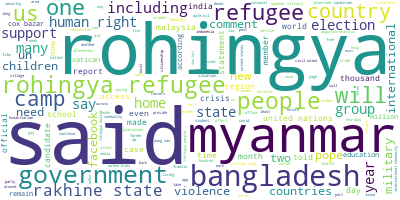

In [24]:
# Join the different processed titles together.
long_string = ','.join(list(myanmar_texts['text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [25]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

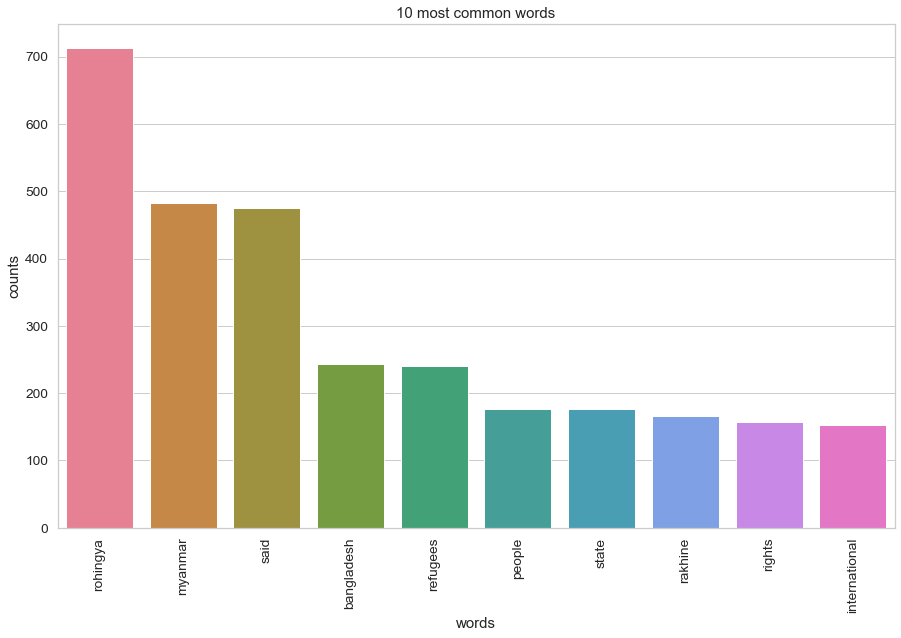

In [26]:
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(myanmar_texts['text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [27]:
# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [28]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
information facebook said emergency people government communities community english bushfire

Topic #1:
pope afineevsky admissions refugee film francis refugees francesco administration trump

Topic #2:
said military amnesty killed myanmar rakhine police rohingya drug refugees

Topic #3:
said myanmar rohingya election rakhine pope francis military state people

Topic #4:
rohingya case myanmar icc investigation crimes state international universal jurisdiction

Topic #5:
rohingya myanmar reuters said people covid 19 united world statement

Topic #6:
rohingya myanmar bangladesh refugees said humanitarian refugee camps children united

Topic #7:
rohingya myanmar app said rights election international eu bangladesh candidates

Topic #8:
said rohingya facebook oil palm malaysia workers reuters myanmar group

Topic #9:
said year school rohingya students refugee indonesia 19 local people


In [29]:
from pyLDAvis import sklearn as sklearn_lda 
import pyLDAvis

In [30]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_newsapi_'+str(number_topics)+'.html')
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_newsapi_'+ str(number_topics) +'.html')

Now we perform the same analysis on our mined New York Times articles. Note again that this dataset is an order of magnitude larger than the previous one.

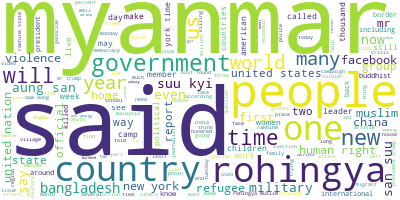

In [31]:
# Join the different processed titles together.
long_string = ','.join(list(nyt_texts['text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

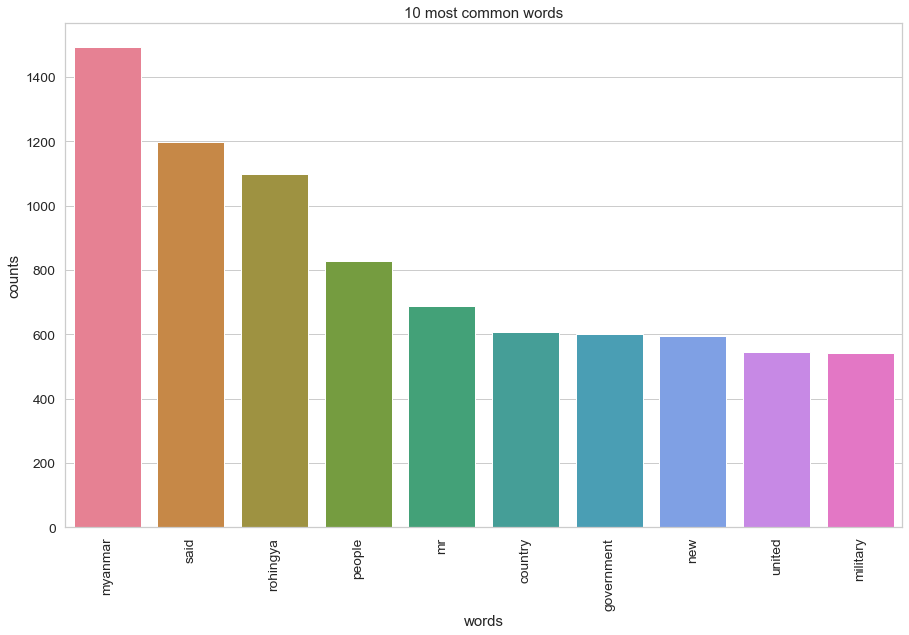

In [32]:
# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(nyt_texts['text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [33]:
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
mr trump said new president like house people states world

Topic #1:
new country north people years ramdev state pompeo mr korea

Topic #2:
myanmar rohingya said military government bangladesh rights united ethnic muslim

Topic #3:
new times york said people myanmar mr country world news

Topic #4:
said people like mr 00 year just children years rohingya

Topic #5:
trump president mr china north said korea world xi chinese

Topic #6:
president country years people states san myanmar kyi aung suu

Topic #7:
said mr india like time political new people world just

Topic #8:
people like new said police morning times briefing facebook mr

Topic #9:
facebook news people new world mr times said like trump


In [34]:
LDAvis_data_filepath = os.path.join('./ldavis_prepared_nyt_'+str(number_topics)+'.html')
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_nyt_'+ str(number_topics) +'.html')